In [1]:
!date

Wed Jun 12 17:13:33 PDT 2019


# Supplementary Figure 11

In [6]:
import glob
import pandas as pd
import numpy as np
import pandas as pd
import scipy as scp
import sklearn
import itertools
from scipy.optimize import fsolve
from upsetplot import generate_data, plot, from_memberships
from collections import Counter
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
%config InlineBackend.figure_format = 'retina'

In [7]:
k1 = pd.read_csv("time_kallisto_step1_bus.csv")
k2 = pd.read_csv("time_kallisto_step2_correct_count.csv")

seq_depth=pd.read_csv("seq_depth_stat.csv")
seq_depth.index = seq_depth["ID"]

wc = pd.read_csv("time_word_count.csv")

In [8]:
k1.index=k1.ID
k2.index=k2.ID
k = k1 + k2
del k["ID"]

In [9]:
k = k.reset_index()

In [10]:
k["max_rss"] = pd.concat([k1["max_rss"], k2["max_rss"]], axis=1).max(axis=1).values

In [11]:
k.s[0] == k1.s[0] + k2.s[0]

True

In [12]:
k["reads"] = k.ID.map(seq_depth["reads"])

In [15]:
wc["reads"] = wc.ID.map(seq_depth["reads"])

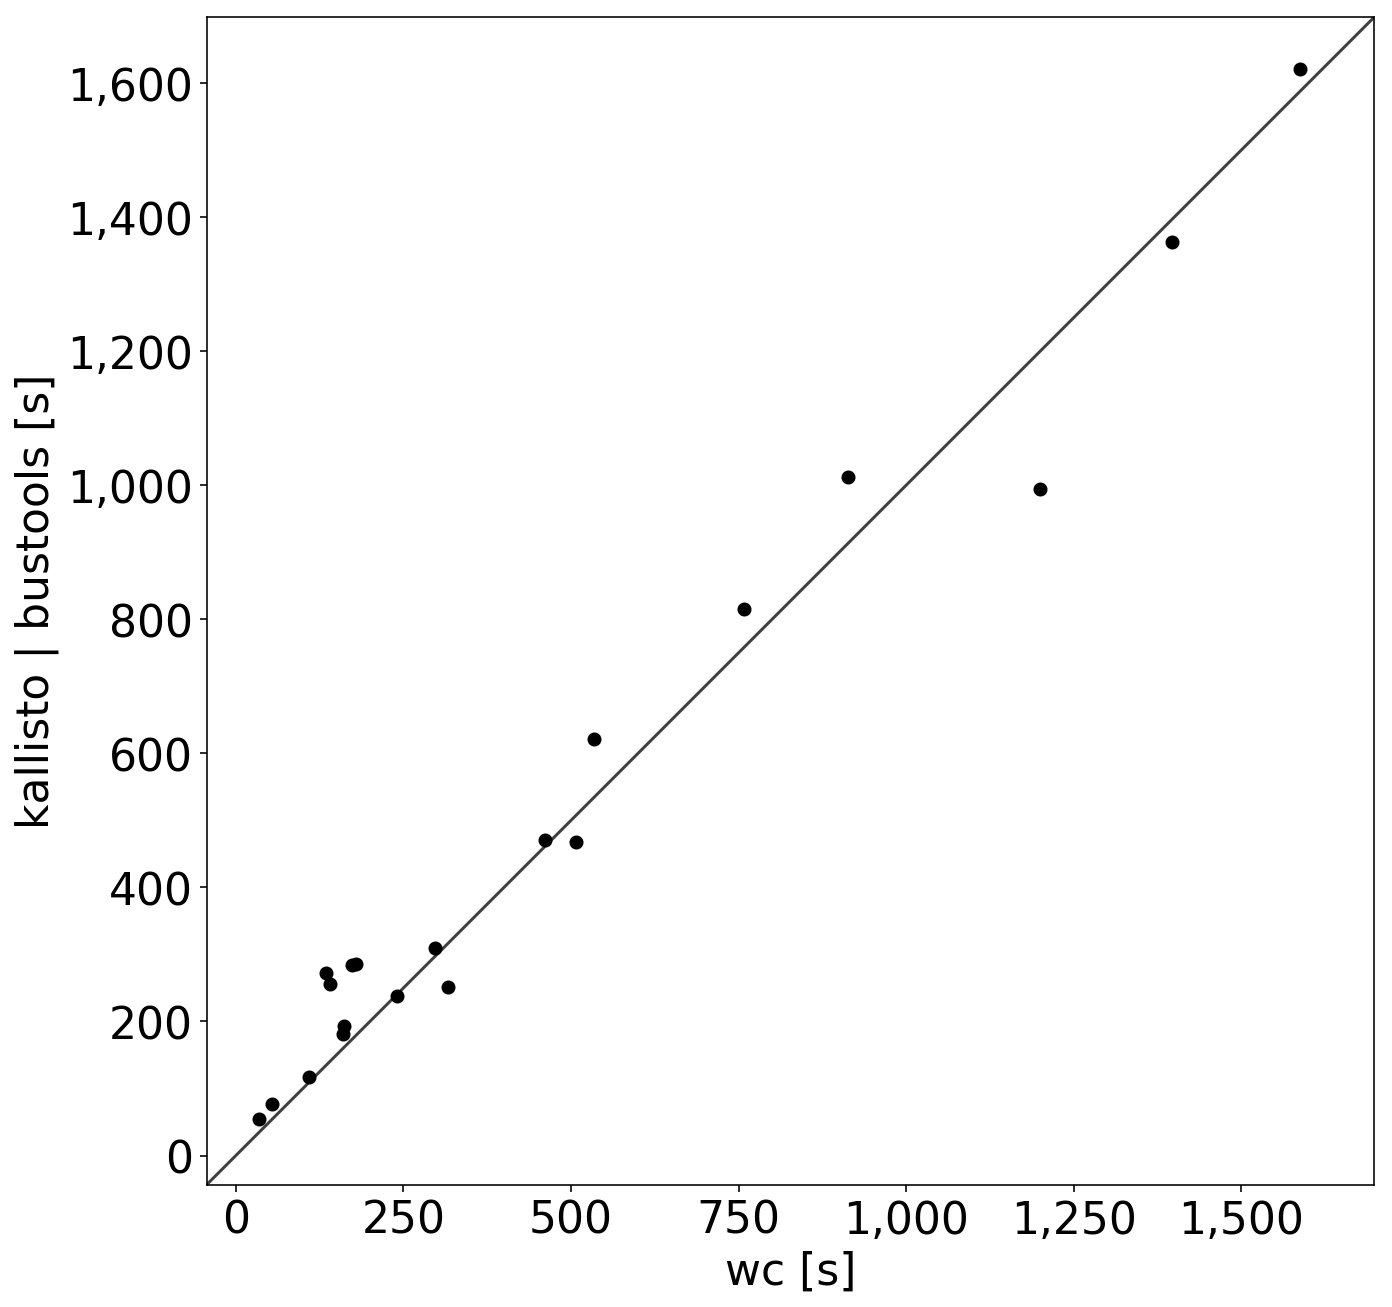

In [16]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(wc["s"], k["s"], color="k")
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
ax.set_xlabel("wc [s]")
ax.set_ylabel("kallisto | bustools [s]")
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.tight_layout()
plt.savefig("wc_runtime.pdf")
plt.show()

In [17]:
wc

,ID,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,reads
0,EMTAB7320_v2,1199.8762,0:19:59,2.98,220.73,0.73,0.76,42289.98,78.77,0,335147976
1,heart1k_v2,179.2501,0:02:59,2.98,220.73,0.73,0.75,5366.95,0.00,0,88872840
2,heart1k_v3,172.5408,0:02:52,2.99,220.73,0.73,0.76,5380.52,0.00,0,84512390
3,hgmm10k_v3,1587.5992,0:26:27,3.02,220.73,0.73,0.76,49111.47,535.31,0,721180737
4,hgmm1k_v2,161.4742,0:02:41,2.99,220.73,0.73,0.76,4230.79,11.63,0,75225120
5,hgmm1k_v3,134.1158,0:02:14,2.98,220.73,0.73,0.76,3393.29,5.50,0,63105786
6,neuron10k_v3,757.4404,0:12:37,2.99,220.73,0.73,0.76,22771.28,11.06,0,357111595
7,pbmc10k_v3,1396.9626,0:23:16,3.02,220.73,0.73,0.76,44169.16,33.50,0,638901019
8,pbmc1k_v3,140.7343,0:02:20,2.98,220.73,0.70,0.74,4683.15,0.00,0,66601887
9,SRR6956073_v2,296.7755,0:04:56,2.99,220.74,0.73,0.76,10730.41,0.00,0,161274652


In [18]:
k

,ID,s,h:m:s,max_rss,max_vms,max_uss,max_pss,io_in,io_out,mean_load,reads
0,EMTAB7320_v2,994.4588,0:14:180:02:16,3539.60,7665.74,6935.64,6936.63,42655.92,13799.55,0,335147976
1,heart1k_v2,285.1943,0:04:080:00:36,3482.91,7660.74,6875.66,6876.68,7132.03,1812.71,0,88872840
2,heart1k_v3,283.7067,0:02:280:02:14,11089.57,15991.73,14567.84,14568.83,5247.34,1659.21,0,84512390
3,hgmm10k_v3,1620.3424,0:19:560:07:04,11461.04,20136.83,18789.62,18790.60,49292.68,30749.70,0,721180737
4,hgmm1k_v2,193.5088,0:02:330:00:39,7264.75,11738.47,10954.49,10955.48,9431.13,1632.67,0,75225120
5,hgmm1k_v3,272.4029,0:02:120:02:19,11389.63,20069.80,18643.35,18644.33,3330.27,2358.64,0,63105786
6,neuron10k_v3,815.5114,0:09:320:04:02,11099.14,16000.32,14598.55,14599.54,22783.70,12977.17,0,357111595
7,pbmc10k_v3,1362.4017,0:17:500:04:51,11249.41,16327.08,14992.24,14993.23,47514.80,20242.26,0,638901019
8,pbmc1k_v3,256.3150,0:02:060:02:09,11194.99,16271.89,14856.13,14857.11,4058.87,1034.66,0,66601887
9,SRR6956073_v2,309.0004,0:04:050:01:03,3412.04,7485.21,6738.47,6739.45,11682.76,5281.75,0,161274652
